# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

# Path to your validation dataset
validation_path = r"C:\Users\moham\OneDrive\Desktop\Dataset\Validation\Validation"

# Load validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_path,
    labels="inferred",           # Infer from folder names
    label_mode="categorical",    # One-hot encode labels
    image_size=(128, 128),       # Resize all images
    color_mode="rgb",            # Keep as RGB
    batch_size=32,
    shuffle=False                # Keep in order for correct evaluation
)

# Get class names
class_names = validation_set.class_names
print("Class names:", class_names)

Found 60 files belonging to 3 classes.
Class names: ['Healthy', 'Powdery', 'Rust']


# Loading Model

In [4]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Visualising and Performing Prediction on Single image

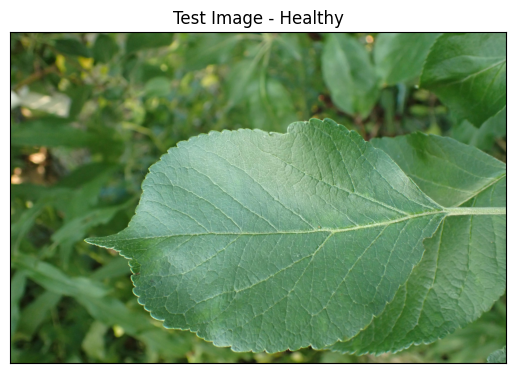

In [6]:
import cv2
import matplotlib.pyplot as plt

# Path to your image
image_path = r"C:\Users\moham\OneDrive\Desktop\Dataset\Test\Test\Healthy\8e7e70a6878c1c79.jpg"

# Read the image
img = cv2.imread(image_path)

# Convert BGR (OpenCV default) to RGB for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.title('Test Image - Healthy')
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


In [13]:
print(input_arr.shape)

(1, 128, 128, 3)


In [15]:
print(predictions)

[[0.6227342  0.3743679  0.00289793]]


In [16]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


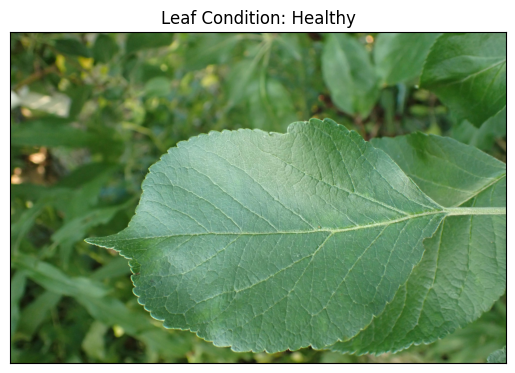

In [12]:
# Displaying the disease prediction
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Leaf Condition: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()